In [1]:
import six

In [2]:
%load_ext autoreload
%autoreload 2


import anchor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-13 12:53:31	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-05-13 12:53:31	Parsing datapackage to create a Study object
2016-05-13 12:54:03	Initializing Study
2016-05-13 12:54:03	Initializing Predictor configuration manager for Study
2016-05-13 12:54:03	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 12:54:03	Added ExtraTreesClassifier to default predictors
2016-05-13 12:54:03	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 12:54:03	Added ExtraTreesRegressor to default predictors
2016-05-13 12:54:03	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 12:54:03	Added GradientBoostingClassifier to default predictors
2016-05-13 12:54:03	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [3]:
ls /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/

downstream400_placental_mammal_conservation.csv
exon2_merkin2012_ancient.csv
exon2_phastcons_placental_mammal.bed
exon2_phastcons_placental_mammal.txt
exons.bed
exons.fasta
exons_merkin2012_ancient_alt_exons.bed
exons_phastcons_placental_mammal.bed
exons_phastcons_placental_mammal.txt
exons_stop_plus1.bed
gc_content.csv
genes_expanded.csv
isoform_domain_effects.csv
isoform_domain_pfam_accession.csv
isoform_domain_pfam_go_id.csv
isoform_domain_pfam_go_name.csv
isoform_domain_pfam_name.csv
isoform_protein_properties/
isoform_translations.csv@
isoform_translations.fa
isoform_translations.fa_iupred_out
isoform_translations.fa_iupred_tmp
isoform_translations_hmmscan_pfamA.txt
isoform_translations_hmmscan_pfamA.txt.err
isoform_translations_hmmscan_pfamA.txt.out
maxentscan.csv
nucleotide_content/
phastcons_placental_mammal.txt@
protein_translations.csv
repetitive_element_overlap.csv
upstream400_placental_mammal_conservation.csv


In [4]:
figure_folder = 'pdfs' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/isoform_domain_effects'
! mkdir $figure_folder

mkdir: cannot create directory `pdfs': File exists


In [5]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)


splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [6]:
isoform_domain_effects = pd.read_csv('{}/isoform_domain_effects.csv'.format(alternative_feature_folder), index_col=0, 
                                     squeeze=True)
six.print_(isoform_domain_effects.shape)
isoform_domain_effects.head()

(22152,)


event_name
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+    No annotated reading frame --> Protein +/- domain
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+                                          Same status
Name: isoform_domain_effects, dtype: object

In [7]:
from anchor import MODALITY_ORDER

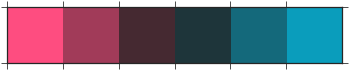

In [151]:
col = 'isoform_domain_effects'

order = MODALITY_ORDER[:3]
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

hue_order = isoform_domain_effects_order
palette = sns.diverging_palette(0, 220, n=6, center='dark', l=60, s=99)
# palette = sns.color_palette('RdYlBu', n_colors=len(isoform_domain_effects_order))
sns.palplot(palette)

In [152]:
domain_total_sizes = isoform_domain_effects.groupby(isoform_domain_effects).size().reset_index()
domain_total_sizes = domain_total_sizes.rename(columns={0: 'count'})
domain_total_sizes.head()

,isoform_domain_effects,count
0,Domain --> No domain,125
1,Domain switch,40
2,No annotated reading frame --> Protein +/- domain,14132
3,No domain --> Domain,654
4,Protein +/- domain --> No annotated reading frame,4203


In [153]:
domain_total_sizes['percentage'] = 100 * domain_total_sizes['count']/domain_total_sizes['count'].sum()
domain_total_sizes.head()

,isoform_domain_effects,count,percentage
0,Domain --> No domain,125,0.564283
1,Domain switch,40,0.180571
2,No annotated reading frame --> Protein +/- domain,14132,63.795594
3,No domain --> Domain,654,2.952329
4,Protein +/- domain --> No annotated reading frame,4203,18.973456


In [154]:
sns.set(context='paper', style='ticks')

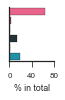

In [155]:
fig, ax = plt.subplots(figsize=(1, 1.5))
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order)
ax.set(xlabel='% in total', yticks=[], ylabel='', xticks=(0, 40, 80), xlim=(0, 80))
# ax.locator_params(nbins=4, axis='x')
sns.despine()
fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution.pdf'.format(figure_folder))

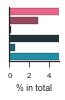

In [156]:
fig, ax = plt.subplots(figsize=(1, 1.5))
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order)
ax.set(xlabel='% in total', yticks=[], ylabel='', xlim=(0, 5))
ax.locator_params(nbins=4, axis='x')
sns.despine()
fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution_zoom5.pdf'.format(figure_folder))

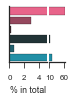

In [157]:
fig, axes = plt.subplots(figsize=(1, 1), ncols=2, gridspec_kw=dict(wspace=0.1, width_ratios=[0.7, 0.3]))
ax = axes[0]
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order, ax=ax)
ax.set(yticks=[], ylabel='', xlim=(0, 5), xlabel='% in total')
ax.locator_params(nbins=4, axis='x')
sns.despine(ax=ax)

ax = axes[1]
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order, ax=ax)
ax.set(xlabel='', yticks=[], ylabel='', xlim=(10, 65), xticks=[10, 60])
# ax.locator_params(nbins=4, axis='x')
sns.despine(ax=ax, left=True)

# fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution_split_axes.pdf'.format(figure_folder))

In [158]:
modalities_domains = study.supplemental.modalities_tidy.join(isoform_domain_effects, on='event_id')
modalities_domains.head()

,phenotype,event_id,modality,isoform_domain_effects
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,No annotated reading frame --> Protein +/- domain
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal,No annotated reading frame --> Protein +/- domain
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,No annotated reading frame --> Protein +/- domain
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,No annotated reading frame --> Protein +/- domain
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal,No annotated reading frame --> Protein +/- domain


In [159]:
sizes = modalities_domains.groupby(['phenotype', 'modality', col]).size()
sizes = sizes.reset_index()
sizes = sizes.rename(columns={0: 'count'})
sizes['percentage'] = 100 *sizes.groupby(['phenotype', 'modality'])['count'].apply(lambda x: x/x.sum())
sizes.head()

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,bimodal,Domain --> No domain,6,0.650054
1,MN,bimodal,Domain switch,2,0.216685
2,MN,bimodal,No annotated reading frame --> Protein +/- domain,460,49.837486
3,MN,bimodal,No domain --> Domain,54,5.850488
4,MN,bimodal,Protein +/- domain --> No annotated reading frame,195,21.126761


In [160]:
sizes.loc[sizes['isoform_domain_effects'] == 'Domain switch']

,phenotype,modality,isoform_domain_effects,count,percentage
1,MN,bimodal,Domain switch,2,0.216685
12,MN,included,Domain switch,5,0.206016
20,NPC,bimodal,Domain switch,4,0.243902
26,NPC,excluded,Domain switch,1,0.094967
32,NPC,included,Domain switch,11,0.291700
41,iPSC,bimodal,Domain switch,3,0.131349
47,iPSC,excluded,Domain switch,4,0.285714
53,iPSC,included,Domain switch,10,0.200441


In [161]:
sizes.loc[sizes['modality'] == 'bimodal']

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,bimodal,Domain --> No domain,6,0.650054
1,MN,bimodal,Domain switch,2,0.216685
2,MN,bimodal,No annotated reading frame --> Protein +/- domain,460,49.837486
3,MN,bimodal,No domain --> Domain,54,5.850488
4,MN,bimodal,Protein +/- domain --> No annotated reading frame,195,21.126761
5,MN,bimodal,Same status,206,22.318527
19,NPC,bimodal,Domain --> No domain,8,0.487805
20,NPC,bimodal,Domain switch,4,0.243902
21,NPC,bimodal,No annotated reading frame --> Protein +/- domain,806,49.146341
22,NPC,bimodal,No domain --> Domain,101,6.158537


In [162]:
sizes.groupby(['phenotype', 'modality'])['percentage'].max()

phenotype  modality     
MN         bimodal          49.837486
           excluded         80.392157
           included         81.788216
           uncategorized    50.000000
NPC        bimodal          49.146341
           excluded         79.582146
           included         81.437285
           uncategorized    33.333333
iPSC       bimodal          48.642732
           excluded         76.214286
           included         80.497094
           uncategorized    45.000000
Name: percentage, dtype: float64

In [163]:
sns.set(context='paper', style='ticks')

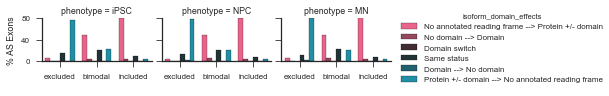

In [164]:
g = sns.factorplot(hue=col, col='phenotype', x='modality', y='percentage', kind='bar',  data=sizes,
#                        hue_order=hue_order, palette=palette, 
                   hue_order=hue_order, aspect=1.3,
                   palette=palette,
                   order=order, size=1.5,
                   col_order=study.phenotype_order)
g.set(yticks=(0, 40, 80), ylim=(0, 80))
g.set_ylabels('% AS Exons')
g.set_xlabels('')
g.savefig('{}/modality_features_isoform_domain_effects_barplot.pdf'.format(figure_folder))

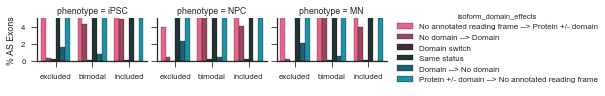

In [165]:

g = sns.factorplot(hue=col, col='phenotype', x='modality', y='percentage', kind='bar',  data=sizes,
#                        hue_order=hue_order, palette=palette, 
                   hue_order=hue_order, aspect=1.3,
                   palette=palette,
                   order=order, size=1.5,
                   col_order=study.phenotype_order)
g.set(ylim=(0, 5), yticks=(0, 2, 4))
g.set_ylabels('% AS Exons')
g.set_xlabels('')
g.savefig('{}/modality_features_isoform_domain_effects_barplot_zoom5.pdf'.format(figure_folder))

In [166]:
modality_order = MODALITY_ORDER[:3]

In [167]:
sizes.loc[sizes.percentage > 60]

,phenotype,modality,isoform_domain_effects,count,percentage
9,MN,excluded,Protein +/- domain --> No annotated reading frame,574,80.392157
13,MN,included,No annotated reading frame --> Protein +/- domain,1985,81.788216
29,NPC,excluded,Protein +/- domain --> No annotated reading frame,838,79.582146
33,NPC,included,No annotated reading frame --> Protein +/- domain,3071,81.437285
50,iPSC,excluded,Protein +/- domain --> No annotated reading frame,1067,76.214286
54,iPSC,included,No annotated reading frame --> Protein +/- domain,4016,80.497094


### Plot with split axes

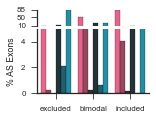

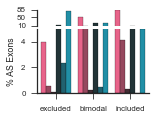

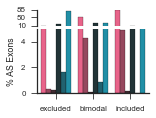

In [168]:

for phenotype, df in sizes.groupby('phenotype'):
    
    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 1.5), 
                             gridspec_kw=dict(hspace=0.075, height_ratios=[0.2, 0.8]))

    ax = axes[0]
    sns.barplot(x='modality', hue=col, y='percentage', data=df, ax=ax,
                hue_order=hue_order, palette=palette, x_order=modality_order)
    ax.legend_.set_visible(False)
    ax.locator_params('y', nbins=4)
    sns.despine(ax=ax, bottom=True)
    ax.tick_params(axis='x', bottom='off')
    ax.set(xticks=[], xlabel='', ylim=(10, 85), ylabel='', yticks=[10, 50, 85])

    ax = axes[1]
    sns.barplot(x='modality', hue=col, y='percentage', data=df, ax=ax,
               hue_order=hue_order, palette=palette, x_order=modality_order)
    ax.set(ylim=(0, 5), ylabel='% AS Exons', 
           xlabel='')
    ax.legend_.set_visible(False)
    ax.locator_params('y', nbins=4)
    sns.despine(ax=ax)


    fig.savefig('{}/modality_features_{}_{}_barplot.pdf'.format(figure_folder, col, phenotype))

### Statistics of enrichment (Hypergeometric)

In [169]:
import six

In [170]:
from scipy.stats import hypergeom

lines = []

for phenotype, phenotype_df in modalities_domains.groupby(['phenotype']):
#     six.print_(phenotype)
    M = phenotype_df.shape[0]
    phenotype_domain_grouped_sizes = phenotype_df.groupby(col).size()
    for modality, modality_df in phenotype_df.groupby('modality'):
        n = modality_df.shape[0]
#         six.print_('\t', modality)
        
        grouped = modality_df.groupby(col)
        for domain, domain_df in modality_df.groupby(col):
#             six.print_('\t\t\t', domain)
            N = phenotype_domain_grouped_sizes[domain]
            x = domain_df.shape[0]

            result = hypergeom.logsf(x, M, n, N)/np.log(10)
#             six.print_('\t\t\t', result)
            lines.append([phenotype, modality, domain, -result])
domain_p_value_df = pd.DataFrame(lines, columns=['phenotype', 'modality', col, '$-\log_{10}(p)$-value'])
domain_p_value_df

,phenotype,modality,isoform_domain_effects,$-\log_{10}(p)$-value
0,MN,bimodal,Domain --> No domain,5.826237e-01
1,MN,bimodal,Domain switch,6.524745e-01
2,MN,bimodal,No annotated reading frame --> Protein +/- domain,2.945635e-12
3,MN,bimodal,No domain --> Domain,3.216350e+00
4,MN,bimodal,Protein +/- domain --> No annotated reading frame,2.424093e-02
5,MN,bimodal,Same status,1.875751e+01
6,MN,excluded,Domain --> No domain,6.450408e+00
7,MN,excluded,No annotated reading frame --> Protein +/- domain,2.861160e-12
8,MN,excluded,No domain --> Domain,1.976678e-12
9,MN,excluded,Protein +/- domain --> No annotated reading frame,2.134184e+02


In [171]:
domain_p_value_df['$-\log_{10}(q)$-value'] =  domain_p_value_df['$-\log_{10}(p)$-value'] - np.log10(domain_p_value_df.shape[0])
domain_p_value_df.head()

,phenotype,modality,isoform_domain_effects,$-\log_{10}(p)$-value,$-\log_{10}(q)$-value
0,MN,bimodal,Domain --> No domain,5.826237e-01,-1.209768
1,MN,bimodal,Domain switch,6.524745e-01,-1.139917
2,MN,bimodal,No annotated reading frame --> Protein +/- domain,2.945635e-12,-1.792392
3,MN,bimodal,No domain --> Domain,3.216350e+00,1.423959
4,MN,bimodal,Protein +/- domain --> No annotated reading frame,2.424093e-02,-1.768151


In [172]:
domain_p_value_df.loc[domain_p_value_df['isoform_domain_effects'] == 'Domain switch']

,phenotype,modality,isoform_domain_effects,$-\log_{10}(p)$-value,$-\log_{10}(q)$-value
1,MN,bimodal,Domain switch,0.652475,-1.139917
12,MN,included,Domain switch,1.007551,-0.784841
20,NPC,bimodal,Domain switch,0.359389,-1.433003
26,NPC,excluded,Domain switch,0.065702,-1.726690
32,NPC,included,Domain switch,1.195273,-0.597118
41,iPSC,bimodal,Domain switch,0.112801,-1.679590
47,iPSC,excluded,Domain switch,0.659960,-1.132431
53,iPSC,included,Domain switch,0.704805,-1.087587


### Get just significantly enriched

In [173]:
domain_p_value_df.loc[domain_p_value_df['$-\log_{10}(q)$-value'] > 10].set_index(['phenotype', 'modality']).sort_index()

isoform_domain_effects  \
phenotype modality                                                      
MN        bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
NPC       bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
iPSC      bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
          included                               No domain --> Domain   

                    $-\log_{10}(p)$-value  $-\log_{10}(q)$-value  
phenotype modality                                                
MN        bimodal               18.757509              16.965118  
          excluded             213.418447             211.626055  
          included             268.232311             266.439919  
NPC       bimodal               24.546828              22.754436  
          excluded             301.492866             299.700475  
          included             418.875053             417.082661  
iPSC      bimodal               25.571953              23.779562  
          excluded             359.799089             358.006697  
          included             553.911648             552.119256  
          included              12.013245              10.220853

In [174]:
domain_p_value_df.loc[domain_p_value_df['$-\log_{10}(q)$-value'] > 5].set_index(['phenotype', 'modality']).sort_index()

isoform_domain_effects  \
phenotype modality                                                      
MN        bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
NPC       bimodal                                         Same status   
          excluded                               Domain --> No domain   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
iPSC      bimodal                                         Same status   
          excluded  Protein +/- domain --> No annotated reading frame   
          included  No annotated reading frame --> Protein +/- domain   
          included                               No domain --> Domain   

                    $-\log_{10}(p)$-value  $-\log_{10}(q)$-value  
phenotype modality                                                
MN        bimodal               18.757509              16.965118  
          excluded             213.418447             211.626055  
          included             268.232311             266.439919  
NPC       bimodal               24.546828              22.754436  
          excluded              11.710007               9.917615  
          excluded             301.492866             299.700475  
          included             418.875053             417.082661  
iPSC      bimodal               25.571953              23.779562  
          excluded             359.799089             358.006697  
          included             553.911648             552.119256  
          included              12.013245              10.220853

In [175]:
domain_p_value_df.to_csv('{}/isoform_domain_effects_hypergeometric_statistical_test.csv'.format(figure_folder))